In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score, roc_curve, auc, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
import gensim.downloader as api
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
train_df = pd.read_csv('Project Data-20250518/train.csv')

#### Label counts

In [3]:
label_count = train_df["label"].value_counts()

label_map = {0: "Bearish", 1: "Bullish", 2: "Neutral"}
label_distribution = {label_map[i]: int(count) for i, count in label_count.items()}

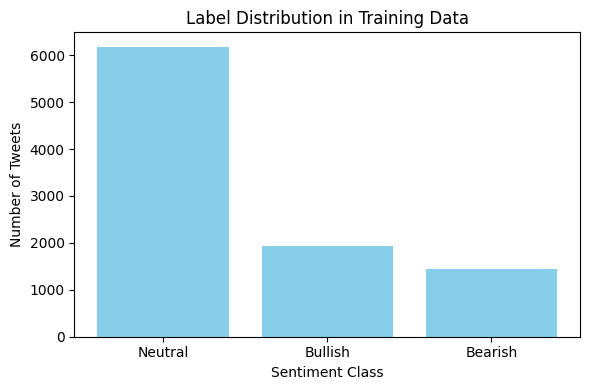

In [4]:
labels = list(label_distribution.keys())
values = list(label_distribution.values())

# Plot the label distribution
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color='skyblue')
plt.title("Label Distribution in Training Data")
plt.ylabel("Number of Tweets")
plt.xlabel("Sentiment Class")
plt.tight_layout()
plt.show()

#### Stock codes column and cleaning data

In [5]:
train_df["stock"] = train_df["text"].apply(lambda x: re.findall(r"\$\w+", x))

In [6]:
train_df['text']

0       $BYND - JPMorgan reels in expectations on Beyo...
1       $CCL $RCL - Nomura points to bookings weakness...
2       $CX - Cemex cut at Credit Suisse, J.P. Morgan ...
3       $ESS: BTIG Research cuts to Neutral https://t....
4       $FNKO - Funko slides after Piper Jaffray PT cu...
                              ...                        
9538    The Week's Gainers and Losers on the Stoxx Eur...
9539    Tupperware Brands among consumer gainers; Unil...
9540    vTv Therapeutics leads healthcare gainers; Myo...
9541      WORK, XPO, PYX and AMKR among after hour movers
9542               YNDX, I, QD and OESX among tech movers
Name: text, Length: 9543, dtype: object

In [7]:
def clean_text(text):
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    
    # Remove stock symbols
    text = re.sub(r"\$\w+[\-:]?\s*", "", text)
    
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    
    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

In [8]:
train_df['text'] = train_df['text'].apply(clean_text)

In [9]:
train_df

,text,label,stock
0,jpmorgan reels in expectations on beyond meat,0,[$BYND]
1,nomura points to bookings weakness at carnival...,0,"[$CCL, $RCL]"
2,cemex cut at credit suisse jp morgan on weak b...,0,[$CX]
3,btig research cuts to neutral,0,[$ESS]
4,funko slides after piper jaffray pt cut,0,[$FNKO]
...,...,...,...
9538,the weeks gainers and losers on the stoxx euro...,2,[]
9539,tupperware brands among consumer gainers unile...,2,[]
9540,vtv therapeutics leads healthcare gainers myom...,2,[]
9541,work xpo pyx and amkr among after hour movers,2,[]


#### Create the tokens

In [10]:
# %pip install --upgrade numpy pandas scipy nltk

In [11]:
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [12]:
print(word_tokenize("The quick brown fox jumps over the lazy dog."))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\diogo/nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\diogo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
nltk.data.path.append("C:/Users/diogo/AppData/Roaming/nltk_data")
nltk.download('punkt')

# Test word_tokenize
print(word_tokenize("The quick brown fox jumps over the lazy dog."))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\diogo/nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\diogo\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\diogo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:/Users/diogo/AppData/Roaming/nltk_data'
**********************************************************************


In [ ]:
def preprocess_text(text):
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    
    # Stemming
    stemmed = [stemmer.stem(word) for word in filtered]
    
    return {
        "tokens": tokens,
        "filtered": filtered,
        "lemmatized": lemmatized,
        "stemmed": stemmed
    }

In [ ]:
preprocessed = train_df['text'].apply(preprocess_text)